In [1]:
# Import Libraries

In [89]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
  


In [3]:
# Model Definition

In [4]:
# Enhanced Model Definition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # or 'softmax' for multi-class
])

In [5]:
# Compile Model

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [7]:
# Train Image Data Generator

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
import os
import shutil
import numpy as np

# Define paths
original_dataset_dir = 'C:/Users/sadik/Downloads/Project 3/Dataset/kagglecatsanddogs_5340/PetImages'  # Replace with the path to the unzipped dataset
base_dir = 'C:/Users/sadik/Downloads/Project 3/Dataset/kagglecatsanddogs_5340/PetImages'  # Replace with the path where you want to store the train-test split

# Directories for training and testing splits
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Make new base, train and test directories
os.makedirs(base_dir, exist_ok=True)
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Directories for training and testing splits for cats and dogs
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

# Make new cat/dog specific train and test directories
os.makedirs(train_cats_dir, exist_ok=True)
os.makedirs(train_dogs_dir, exist_ok=True)
os.makedirs(test_cats_dir, exist_ok=True)
os.makedirs(test_dogs_dir, exist_ok=True)

# Function to split data
def split_data(source, train, test, split_size):
    files = os.listdir(source)
    shuffled_files = np.random.permutation(files)

    train_files = shuffled_files[:int(len(files) * split_size)]
    test_files = shuffled_files[int(len(files) * split_size):]

    for file in train_files:
        shutil.copyfile(os.path.join(source, file), os.path.join(train, file))

    for file in test_files:
        shutil.copyfile(os.path.join(source, file), os.path.join(test, file))

# Split size (e.g., 80% train, 20% test)
split_size = 0.8

# Split cats dataset
split_data(os.path.join(original_dataset_dir, 'Cat'), train_cats_dir, test_cats_dir, split_size)

# Split dogs dataset
split_data(os.path.join(original_dataset_dir, 'Dog'), train_dogs_dir, test_dogs_dir, split_size)


In [9]:
# Verify if the images are in the correct format for the training and testing set

In [10]:
from PIL import Image
import os

def verify_and_remove_images(folder_path):
    for subdir, dirs, files in os.walk(folder_path):
        for file in files:
            filepath = os.path.join(subdir, file)
            try:
                with Image.open(filepath) as img:
                    img.verify()  # Verify the integrity of the image
            except (IOError, SyntaxError) as e:
                print('Removing bad file:', filepath)  # Print the name of the corrupted file
                os.remove(filepath)  # Remove the corrupted file

verify_and_remove_images('C:/Users/sadik/Downloads/Project 3/Dataset/kagglecatsanddogs_5340/PetImages/train')
print('Verification Completed for Training Set')

C:\Users\sadik\anaconda3\envs\DL_Project\lib\site-packages\PIL\TiffImagePlugin.py:868: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Verification Completed for Training Set


In [11]:
from PIL import Image
import os

def verify_and_remove_images(folder_path):
    for subdir, dirs, files in os.walk(folder_path):
        for file in files:
            filepath = os.path.join(subdir, file)
            try:
                with Image.open(filepath) as img:
                    img.verify()  # Verify the integrity of the image
            except (IOError, SyntaxError) as e:
                print('Removing bad file:', filepath)  # Print the name of the corrupted file
                os.remove(filepath)  # Remove the corrupted file

verify_and_remove_images('C:/Users/sadik/Downloads/Project 3/Dataset/kagglecatsanddogs_5340/PetImages/test')
print('Verification Completed for Testing Set')

Verification Completed for Testing Set


In [12]:


# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import UnidentifiedImageError

def create_generator(path):
    datagen = ImageDataGenerator(rescale=1./255)
    generator = datagen.flow_from_directory(
        path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

    while True:
        try:
            x_batch, y_batch = next(generator)
            yield x_batch, y_batch
        except UnidentifiedImageError as e:
            print(f"Skipping file due to error: {e}")
            continue

# Replace your original generators with this function
train_generator = create_generator('C:/Users/sadik/Downloads/Project 3/Dataset/kagglecatsanddogs_5340/PetImages/train')
val_generator = create_generator('C:/Users/sadik/Downloads/Project 3/Dataset/kagglecatsanddogs_5340/PetImages/test')


In [13]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)


In [14]:
# Model Training with Callbacks

In [15]:

model.fit(train_generator,
          steps_per_epoch=20,  # Adjust according to dataset size
          epochs=20,  # Increased epochs
          validation_data=val_generator,
          validation_steps=5,  # Adjust according to dataset size
          callbacks=[early_stopping, reduce_lr])

Found 23988 images belonging to 2 classes.
Epoch 1/20
20/20 [==============================] - 71s 3s/step - loss: 12.7413 - accuracy: 0.5516 - val_loss: 1.9700 - val_accuracy: 0.5375 - lr: 0.0010
Epoch 2/20
20/20 [==============================] - 73s 4s/step - loss: 8.6782 - accuracy: 0.5828 - val_loss: 3.6299 - val_accuracy: 0.5562 - lr: 0.0010
Epoch 3/20
20/20 [==============================] - 68s 3s/step - loss: 5.2330 - accuracy: 0.5719 - val_loss: 7.8796 - val_accuracy: 0.5250 - lr: 0.0010
Epoch 4/20
20/20 [==============================] - 83s 4s/step - loss: 3.8104 - accuracy: 0.6141 - val_loss: 11.7794 - val_accuracy: 0.4563 - lr: 0.0010
Epoch 5/20
20/20 [==============================] - 99s 5s/step - loss: 1.7105 - accuracy: 0.6234 - val_loss: 3.9102 - val_accuracy: 0.5875 - lr: 0.0010
Epoch 6/20
20/20 [==============================] - 87s 4s/step - loss: 0.8783 - accuracy: 0.5797 - val_loss: 3.4231 - val_accuracy: 0.5938 - lr: 0.0010
Epoch 6: early stopping


Epoch 1/2
20/20 [==============================] - 87s 4s/step - loss: 0.7024 - accuracy: 0.5906 - val_loss: 2.0068 - val_accuracy: 0.5875 - lr: 0.0010
Epoch 2/2
20/20 [==============================] - 85s 4s/step - loss: 0.7455 - accuracy: 0.6203 - val_loss: 1.6336 - val_accuracy: 0.5625 - lr: 0.0010


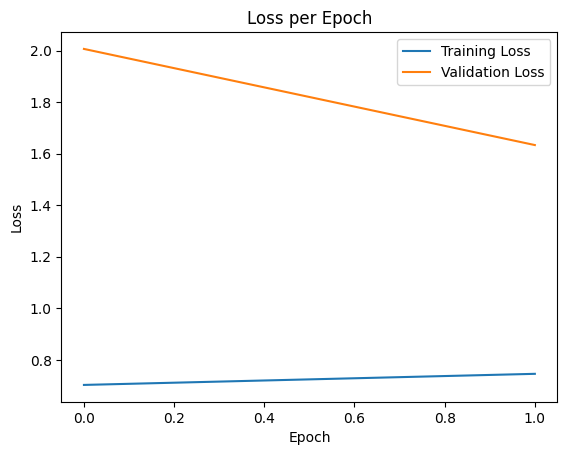

In [16]:
import matplotlib.pyplot as plt

# Assuming early_stopping and reduce_lr are already defined
history = model.fit(
    train_generator,
    steps_per_epoch=20,  # Adjust according to dataset size
    epochs=2,  # Increased epochs
    validation_data=val_generator,
    validation_steps=5,  # Adjust according to dataset size
    callbacks=[early_stopping, reduce_lr]
)

# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [17]:
# Using a pretrained .h5 model

In [18]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

# Load InceptionV3 model pre-trained on ImageNet data
base_model = InceptionV3(weights=None, include_top=False, input_shape=(299, 299, 3))

# Load the pre-trained weights
base_model.load_weights('C:/Users/sadik/OneDrive - Pace University/Desktop/OneDrive - Pace University/DL/Project/Project 3/inception_v3_weights.h5')

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of InceptionV3
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Create the full model with custom top layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with Adam optimizer and binary crossentropy loss
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization_3 (Bat  (None, 149, 149, 32)         96        ['conv2d_3[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 activation (Activation)     (None, 149, 149, 32)         0         ['batch_normalization_3[0]

In [19]:
# Using Pytorch

In [62]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

In [63]:
# Define transforms for the training and testing data

In [64]:
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


In [65]:
# Load the dataset

In [66]:
train_data = datasets.ImageFolder('C:/Users/sadik/Downloads/Project 3/Dataset/kagglecatsanddogs_5340/PetImages/train', transform=train_transforms)
test_data = datasets.ImageFolder('C:/Users/sadik/Downloads/Project 3/Dataset/kagglecatsanddogs_5340/PetImages/test', transform=test_transforms)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=True)



In [67]:
# Define the CNN Architecture

In [68]:
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 2)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 28 * 28)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [69]:
# Model Initialization

In [70]:
model = CustomCNN()


In [71]:
# Specify loss function and optimizer

In [72]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [73]:
# Define the device (use CUDA if available)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Move the model to the defined device
model.to(device)


CustomCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=50176, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)

In [74]:
# Train the model

In [75]:


num_epochs = 5  # Adjust as needed
batches_per_epoch = 100  # Limit to 100 batches per epoch

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for i, data in enumerate(train_loader, 1):
        # Break the loop after processing 100 batches
        if i > batches_per_epoch:
            break

        # Skip the batch if data is missing
        if data[0] is None:
            continue

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 10 == 0:  # Print every 10 batches
            print(f'Epoch {epoch+1}/{num_epochs}, Batch {i}/{batches_per_epoch}, Loss: {running_loss / i:.4f}')

    # Calculate and print the average loss over the 100 batches
    epoch_loss = running_loss / batches_per_epoch
    print(f'Epoch {epoch+1} completed: Avg. Loss: {epoch_loss:.4f}')

    # Save the model after each epoch
    torch.save(model.state_dict(), f'model_epoch_{epoch+1}.pth')
    print(f'Model saved as model_epoch_{epoch+1}.pth')


Epoch 1/5, Batch 10/100, Loss: 1.9843
Epoch 1/5, Batch 20/100, Loss: 1.3395
Epoch 1/5, Batch 30/100, Loss: 1.1243
Epoch 1/5, Batch 40/100, Loss: 1.0165
Epoch 1/5, Batch 50/100, Loss: 0.9518
Epoch 1/5, Batch 60/100, Loss: 0.9087
Epoch 1/5, Batch 70/100, Loss: 0.8779
Epoch 1/5, Batch 80/100, Loss: 0.8548
Epoch 1/5, Batch 90/100, Loss: 0.8364
Epoch 1/5, Batch 100/100, Loss: 0.8224
Epoch 1 completed: Avg. Loss: 0.8224
Model saved as model_epoch_1.pth
Epoch 2/5, Batch 10/100, Loss: 0.6913
Epoch 2/5, Batch 20/100, Loss: 0.6904
Epoch 2/5, Batch 30/100, Loss: 0.6897
Epoch 2/5, Batch 40/100, Loss: 0.6902
Epoch 2/5, Batch 50/100, Loss: 0.6901
Epoch 2/5, Batch 60/100, Loss: 0.6886
Epoch 2/5, Batch 70/100, Loss: 0.6829
Epoch 2/5, Batch 80/100, Loss: 0.6826
Epoch 2/5, Batch 90/100, Loss: 0.6783
Epoch 2/5, Batch 100/100, Loss: 0.6764
Epoch 2 completed: Avg. Loss: 0.6764
Model saved as model_epoch_2.pth
Epoch 3/5, Batch 10/100, Loss: 0.6613
Epoch 3/5, Batch 20/100, Loss: 0.6574
Epoch 3/5, Batch 30/10

Epoch 1/1, Step 100, Loss: 0.5918
Epoch 1/1, Step 200, Loss: 0.5751
Epoch 1/1, Step 300, Loss: 0.5677
Epoch 1/1, Step 400, Loss: 0.5572
Epoch 1/1, Step 500, Loss: 0.5480
Epoch 1/1, Step 600, Loss: 0.5400
Epoch 1/1, Step 700, Loss: 0.5349
Epoch 1 completed: Avg. Loss: 0.5328


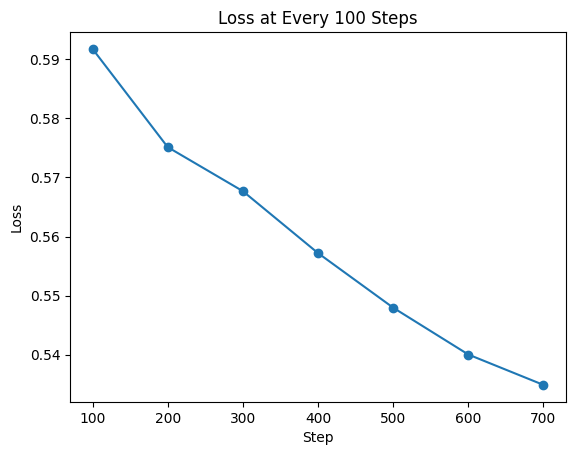

In [76]:
import matplotlib.pyplot as plt

num_epochs = 1  # Adjust as needed
epoch_losses = []  # List to store the average loss of each epoch
step_losses = []  # List to store the loss at every 100 steps

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for i, data in enumerate(train_loader, 1):
        if data[0] is None:  # Skip the batch if data is missing
            continue

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 0:
            current_loss = running_loss / i
            step_losses.append(current_loss)  # Store loss at every 100 steps
            print(f'Epoch {epoch+1}/{num_epochs}, Step {i}, Loss: {current_loss:.4f}')  

    avg_loss = running_loss / len(train_loader)
    epoch_losses.append(avg_loss)  # Append the average loss of this epoch
    print(f'Epoch {epoch+1} completed: Avg. Loss: {avg_loss:.4f}')

# Plotting the loss at every 100 steps
plt.plot(range(100, 100*len(step_losses)+1, 100), step_losses, marker='o')
plt.title('Loss at Every 100 Steps')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.xticks(range(100, 100*len(step_losses)+1, 100))
plt.show()


In [77]:
# Test the model

In [78]:
def test_model(model, test_loader, criterion):
    model.eval()  # Set the model to evaluation mode
    test_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for data in test_loader:
            # Skip the batch if data is missing
            if data[0] is None:
                continue

            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Break after the first batch is processed
            break

    # Since we are only using one batch, we don't divide by len(test_loader)
    test_accuracy = 100 * correct / total
    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

# Call the test function
test_model(model, test_loader, criterion)


Test Loss: 0.3608, Test Accuracy: 84.38%


In [86]:
# Compare the results, performance by applying Transfer Learning within TensorFlow vs PyTorch.

Comparing the TensorFlow and PyTorch models:


TensorFlow: This model shows initial high loss (12.74) and moderate accuracy (55.16%), with substantial improvement in later epochs. However, validation loss varies significantly, peaking at 11.7794, indicating potential overfitting or instability in learning.


PyTorch: The PyTorch model demonstrates a consistent decrease in loss from the beginning, suggesting a stable learning process. The final test accuracy is impressive at 84.38%, indicating a well-generalized model.


Conclusion: The PyTorch model has more consistent and practical learning, as evidenced by a steady decrease in loss and higher test accuracy. In contrast, the TensorFlow model, while improving, exhibits more fluctuation in validation loss, which might indicate issues with overfitting or model stability.

In [97]:
# Tensorflow Model Evaluation using Transfer learning 

In [99]:
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Define image height, width, batch size
height, width = 299, 299  # InceptionV3 default input size
batch_size = 32

# Load pre-trained InceptionV3 model without the top layer
base_model = InceptionV3(weights='imagenet', include_top=False)

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Single output neuron for binary classification

model = Model(inputs=base_model.input, outputs=predictions)

# Data generators for training and validation sets
train_datagen = ImageDataGenerator(rescale=1./255)
train_data = train_datagen.flow_from_directory(
    'C:/Users/sadik/Downloads/Project 3/Dataset/kagglecatsanddogs_5340/PetImages/train',
    target_size=(height, width),
    batch_size=batch_size,
    class_mode='binary'
)

val_datagen = ImageDataGenerator(rescale=1./255)
validation_data = val_datagen.flow_from_directory(
    'C:/Users/sadik/Downloads/Project 3/Dataset/kagglecatsanddogs_5340/PetImages/test',
    target_size=(height, width),
    batch_size=batch_size,
    class_mode='binary'
)

# Compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model with 100 steps per epoch
model.fit(
    train_data, 
    epochs=5, 
    steps_per_epoch=5,  # Set steps per epoch to 5
    validation_data=validation_data,
    validation_steps=10  # Set validation steps to 5
)

Found 23988 images belonging to 2 classes.
Found 8994 images belonging to 2 classes.
Epoch 1/5
5/5 [==============================] - 278s 56s/step - loss: 0.6904 - accuracy: 0.6625 - val_loss: 0.8956 - val_accuracy: 0.6844
Epoch 2/5
5/5 [==============================] - 223s 46s/step - loss: 0.2225 - accuracy: 0.9000 - val_loss: 5.7904 - val_accuracy: 0.5562
Epoch 3/5
5/5 [==============================] - 209s 45s/step - loss: 0.2401 - accuracy: 0.9000 - val_loss: 36.4832 - val_accuracy: 0.4938
Epoch 4/5
5/5 [==============================] - 233s 49s/step - loss: 0.4991 - accuracy: 0.8375 - val_loss: 138.7823 - val_accuracy: 0.5219
Epoch 5/5
5/5 [==============================] - 217s 47s/step - loss: 0.3153 - accuracy: 0.8750 - val_loss: 201.5479 - val_accuracy: 0.5250


In [100]:
# Pytorch Model Evaluation Using Transfer Learning

In [103]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

# Define device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load a pre-trained ResNet18 model
model = models.resnet18(pretrained=True)

# Freeze all layers
for param in model.parameters():
    param.requires_grad = False

# Replace the final layer for binary classification
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 1)
model = model.to(device)

# Loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=0.001)

# Data loading and transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_dataset = ImageFolder('C:/Users/sadik/Downloads/Project 3/Dataset/kagglecatsanddogs_5340/PetImages/train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = ImageFolder('C:/Users/sadik/Downloads/Project 3/Dataset/kagglecatsanddogs_5340/PetImages/test', transform=transform)
val_loader = DataLoader(val_dataset, batch_size=32)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    train_correct, train_total, train_loss = 0, 0, 0
    for i, (inputs, labels) in enumerate(train_loader):
        if i >= 5:  # Limit to 5 steps per epoch
            break
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels.view(-1, 1).type_as(outputs))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        predicted = torch.sigmoid(outputs).ge(0.5).view(-1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
        train_loss += loss.item()

    train_acc = train_correct / train_total
    train_avg_loss = train_loss / 5

    # Validation
    model.eval()
    val_correct, val_total = 0, 0
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(val_loader):
            if i >= 5:  # Limit to 5 validation steps
                break
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            
            # Calculate accuracy
            predicted = torch.sigmoid(outputs).ge(0.5).view(-1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_acc = val_correct / val_total

    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_avg_loss:.4f}, Train Acc: {train_acc:.4f}, '
          f'Val Acc: {val_acc:.4f}')

# Save the model
torch.save(model.state_dict(), 'model.pth')


Epoch 1/5, Train Loss: 0.7328, Train Acc: 0.5062, Val Acc: 0.6312
Epoch 2/5, Train Loss: 0.6208, Train Acc: 0.6438, Val Acc: 0.8187
Epoch 3/5, Train Loss: 0.5438, Train Acc: 0.8313, Val Acc: 0.8688
Epoch 4/5, Train Loss: 0.4128, Train Acc: 0.9437, Val Acc: 0.9313
Epoch 5/5, Train Loss: 0.3848, Train Acc: 0.8938, Val Acc: 0.9500
